<a href="https://colab.research.google.com/github/julianamo93/CP02-Pt1-Keras/blob/main/CHECKPOINT_02_PARTE_01_KERAS_2TDSP_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **CHECKPOINT 02 (Parte 01): Modelos com Redes Neurais com Keras**

#### Disciplina:  Disruptive Architectures: IOT, IOB e GENERATIVE AI

#### Turmas: 2TDSZ-2024 (2o sem/2024)

#### Professor: André Tritiack

#### Pontuação Máxima: 4.00 pontos

*   RM: 554113 - Juliana Moreira da Silva
*   RM: 552590 - Kevin Christian Nobre
*   RM: 552728 - Sabrina do Couto Xavier Lima









# **Introdução**

Durante o semestre, estudamos o uso de algoritmos de **Aprendizado de Máquina Supervisionado**.

- Regressão Logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- Naive Bayes

https://scikit-learn.org/stable/modules/naive_bayes.html

- Máquina de Vetor Suporte (SVM)

https://scikit-learn.org/stable/modules/svm.html#classification

- Árvore de Decisão (Decision Tree)

https://scikit-learn.org/stable/modules/tree.html

- Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Cada uma dessas técnicas tem uma forte base matemática e conceitual. Os algoritmos foram propostos ao longo de diversas décadas e possuem diferentes cenários de aplicações.

Nos exercícios a seguir, você e seu grupo receberão conjuntos de dados e precisarão aplicar duas dessas técnicas em cada exercício, utilizando como métrica a acurácia.

Em seguida, utilizando a biblioteca Keras, crie modelos de Redes Neurais para classificação e compare os resultados.

Altere o número de neurônios, a quantidade de camadas e as funções de ativação para comparar os resultados.

Use o exemplo demonstrado em aula para criar sua solução.

Importante: Somente serão aceitos arquivos .ipynb comentados, com justificativas e conclusões sobre as implementações

------------------
## <font color='red'> Atenção</fonte>:

A seguir são apresentados dois datasets de pessoas reais.

Ao se trabalhar com dados de pessoas devemos considerar a origem e os preceitos **bioéticos** envolvidos em sua coleta, construção e utilização.

Além disso, é boa prática que os dados estejam anonimizados.

----------------------
# **QUESTÃO 01**

## **Diagnóstico médico: Problemas Ortopédicos na Coluna Vertebral**

Esse dataset contém dados sobre problemas ortopédicos na coluna vertebral, diagnosticados no Centre Médico-Chirurgical de Réadaptation des Massues, em Lyon, France. Contém 6 atributos biomecânicos para 310 entradas anonimizadas, sendo 100 de pacientes considerados sem problemas (Normal - NO), 60 de pacientes com Hérnia de Disco (Disk Hernia - DH) e 150 de pacientes com Espondilolistese (Spondylolisthesis - SL).

O dataset foi disponibilizado em um arquivo .csv, em anexo da tarefa.

Maiores informações disponíveis em https://www.openml.org/d/1523

## Parte 1: Importação de bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

# Parte 2: Importação dos dados e Análise Exploratória


*   Carregando e Iniciando a EDA no Dataset.

In [ ]:
# carregando o dataset
data = pd.read_csv('questao_01.csv')

In [ ]:
# visualizando as primeiras linhas
print(data.head())

   Unnamed: 0         V1         V2         V3         V4          V5  \
0           0  63.027818  22.552586  39.609117  40.475232   98.672917   
1           1  39.056951  10.060991  25.015378  28.995960  114.405425   
2           2  68.832021  22.218482  50.092194  46.613539  105.985136   
3           3  69.297008  24.652878  44.311238  44.644130  101.868495   
4           4  49.712859   9.652075  28.317406  40.060784  108.168725   

          V6   diagnostic  
0  -0.254400  Disk Hernia  
1   4.564259  Disk Hernia  
2  -3.530317  Disk Hernia  
3  11.211523  Disk Hernia  
4   7.918501  Disk Hernia  


In [ ]:
# verificando os dados do shape
data.shape

(310, 8)

In [ ]:
# verificando os dados das colunas
data.columns

Index(['Unnamed: 0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'diagnostic'], dtype='object')

# Parte 3: Pré Processamento




In [ ]:
# Codificando variáveis categóricas (se necessário)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['diagnostic'] = le.fit_transform(data['diagnostic']) # converte categorias em números

# Parte 4: Criação das variáveis com os dados de entrada (X) e dados de saída (y) e separação de dados de treinamento e teste.

In [ ]:
# Dados de entrada (X) e saída (y)
X = data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6']] # features do modelo
y = data['diagnostic'] # target (valor a ser previsto)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(248, 6)

In [ ]:
y_train.shape

(248,)

In [ ]:
data['diagnostic'].value_counts()

,count
diagnostic,
2,150
1,100
0,60


In [ ]:
# convertendo a coluna 'diagnostic' para categórico, se necessário
data['diagnostic'] = data['diagnostic'].astype('category')

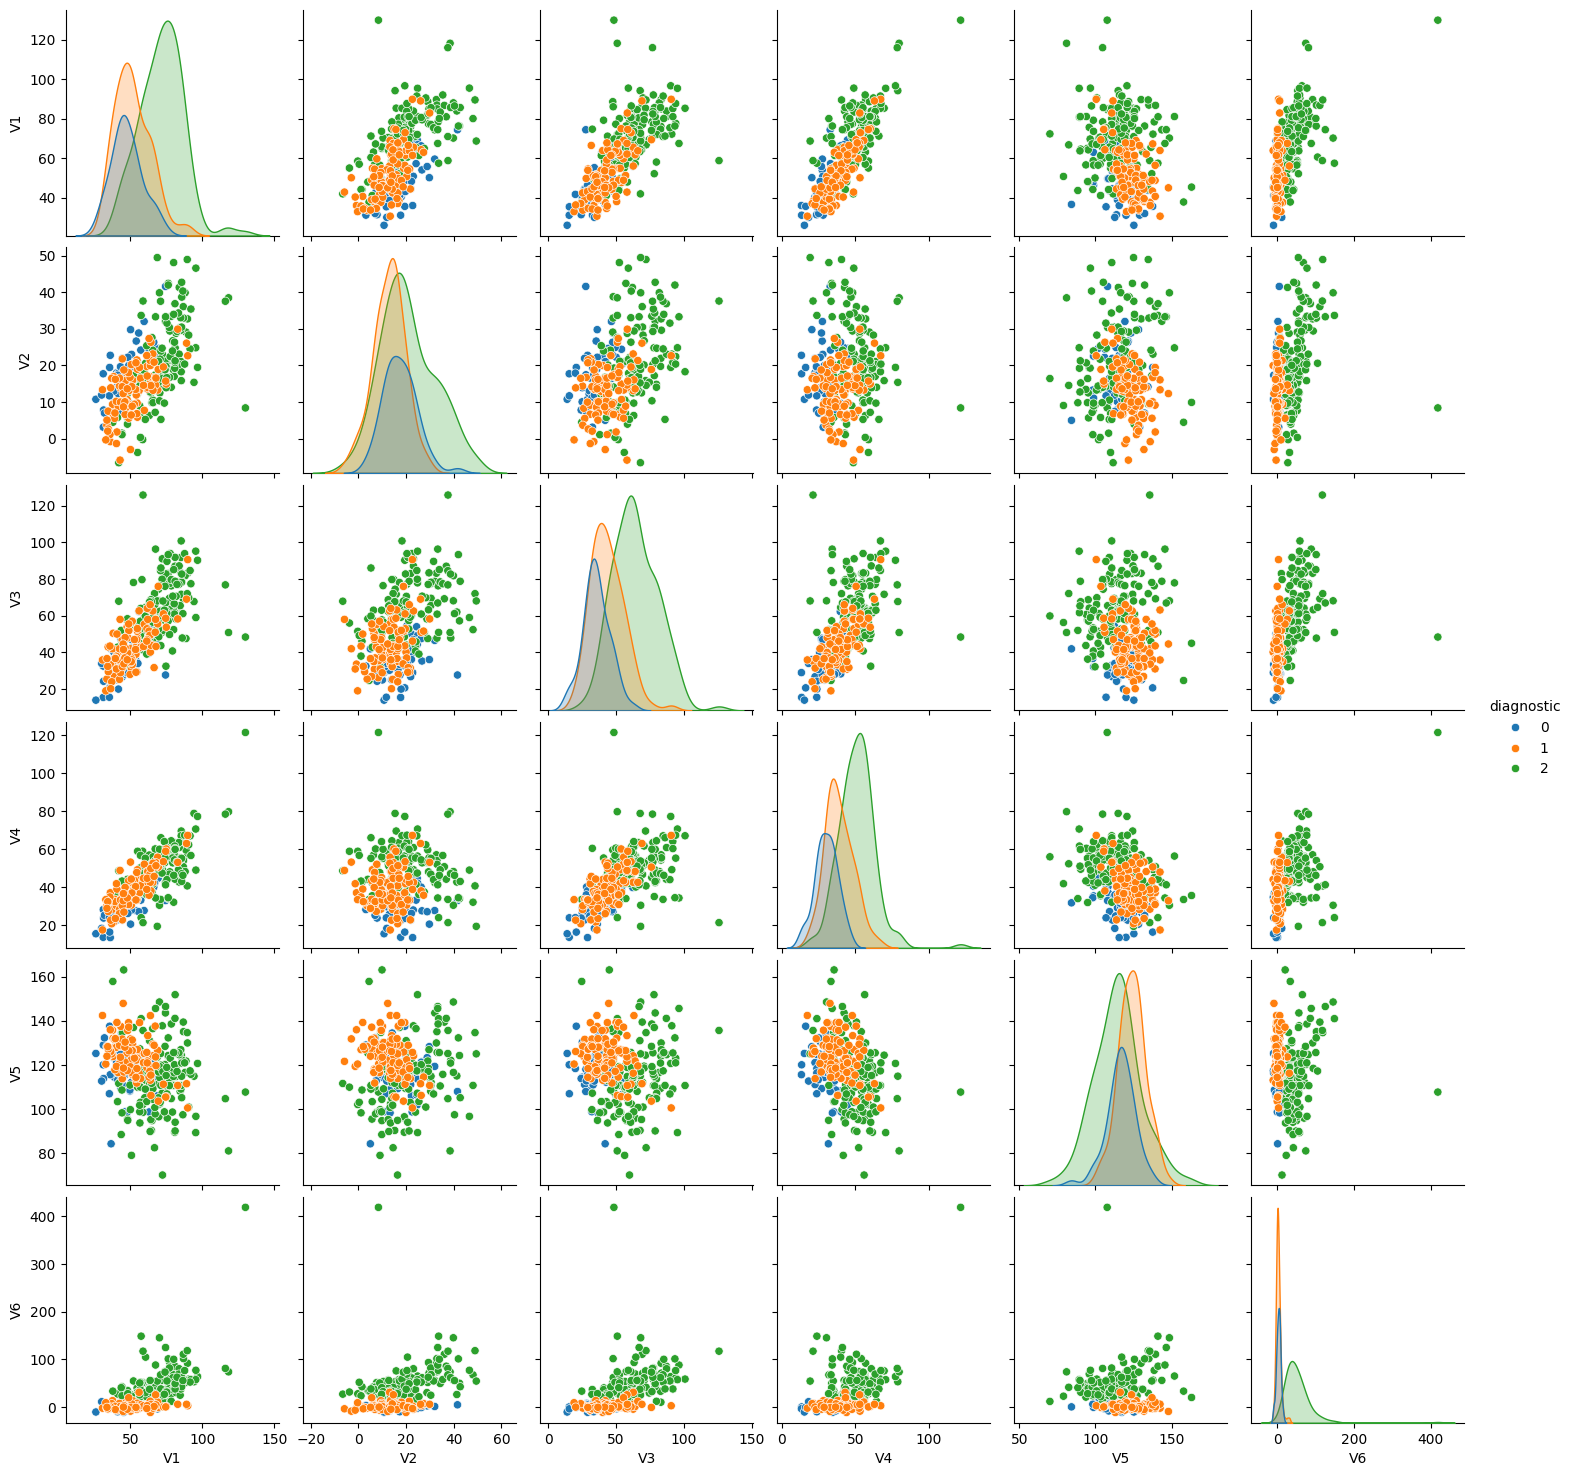

In [ ]:
# Gráfico de dispersão das classes V1 e V2
sns.pairplot(data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'diagnostic']], hue='diagnostic')
plt.show()

# Parte 5.1: Criação do primeiro modelo, utilizando o primeiro algoritmo.






In [ ]:
# Arquitetura de rede neural
modeloRNA = Sequential()

In [ ]:
# Input layer ------> 2 neurônios (2 features)
# Hidden Layer 1 -----> 10 neurônios (escolhido arbitrariamente)
# A função de ativação "relu" é a mais utilizada para camadas ocultas
modeloRNA.add(Dense(units=10, activation='relu', input_dim=6))
# Hidden Layer 2 -----> 5 neurônios (escolhido arbitrariamente)
modeloRNA.add(Dense(units=5, activation='relu'))
# Output Layer -----> 3 neurônios (3 classes para prever)
# A função softmax é utilizada em problemas de classificação multiclasses
# A função sigmoid é utilizada em problemas de classificação binária
modeloRNA.add(Dense(units=3, activation='softmax'))

In [ ]:
# Resumo da arquitetura
modeloRNA.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143 (572.00 B)

 Trainable params: 143 (572.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilando a rede
# Função de custo (Loss Function)
# Classificação Multiclasses ----> categorical_crossentropy
# Classificação Binária ----> binary_crossentropy
# Regressão ----> mse (erro médio quadrático)
modeloRNA.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Conversão do array y em 4 colunas booleanas
# Isso é necessário para adequar o formato dos dados de y à arquitetura da rede
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [ ]:
# Treinamento de rede
modeloRNA.fit(X_train, y_train, epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2098 - loss: 78.7104
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2176 - loss: 67.7515 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2152 - loss: 59.7992 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1869 - loss: 54.0282 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2056 - loss: 43.7329 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2019 - loss: 35.9488 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1924 - loss: 28.2478 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1605 - loss: 20.8019 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1813 - loss: 13.4480 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1791 - loss: 8.1050 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2711 - loss: 5.6625 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.35

In [ ]:
y_predict = modeloRNA.predict(X_test)
y_predict

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[6.5746689e-01, 3.4230286e-01, 2.3020926e-04],
       [6.4148903e-02, 8.5884649e-01, 7.7004671e-02],
       [2.8734717e-01, 7.0619106e-01, 6.4617544e-03],
       [3.5367924e-09, 5.0333874e-05, 9.9994963e-01],
       [3.9289308e-01, 6.0569000e-01, 1.4169044e-03],
       [9.8764652e-04, 7.0466422e-02, 9.2854589e-01],
       [1.9869461e-07, 9.2395021e-05, 9.9990731e-01],
       [2.4020174e-08, 3.1573747e-04, 9.9968421e-01],
       [4.3787960e-02, 9.2083263e-01, 3.5379365e-02],
       [2.2309281e-01, 7.4571574e-01, 3.1191522e-02],
       [1.1137977e-07, 8.5131251e-05, 9.9991471e-01],
       [5.5672683e-07, 9.9019019e-04, 9.9900919e-01],
       [2.9959819e-01, 6.9906765e-01, 1.3341010e-03],
       [2.6739424e-01, 7.3231339e-01, 2.9238529e-04],
       [5.7442111e-01, 4.2507550e-01, 5.0336495e-04],
       [8.5021734e-01, 1.4936949e-01, 4.1317919e-04],
       [7.7371109e-01, 2.2516619e-01, 1.1227863e-03],
       [1.8677932e-07, 6.5797358e-04, 9.9934179e-01],
       [1.2332940e-02, 5.616

# Parte 6: Comparação das métricas dos modelos (utilize somente a acurácia nesse exemplo)

In [ ]:
# Previsões do primeiro modelo (rede neural)
y_pred_modelo1 = modeloRNA.predict(X_test)
y_pred_classes_modelo1 = np.argmax(y_pred_modelo1, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
# Calcule a acurácia
accuracy_modelo1 = accuracy_score(y_test, y_pred_classes_modelo1)

In [ ]:
# Exiba as acurácias
print(f"Acurácia do Modelo 1 (Rede Neural): {accuracy_modelo1:.2f}")

Acurácia do Modelo 1 (Rede Neural): 0.74


#Conclusão

Após o estudo realizado, obtemos uma precisão média em torno de **74%**.


---------------------------------

*   O modelo começou com um desempenho bastante baixo, com uma precisão inicial de cerca de 20%, mas foi melhorando gradualmente ao longo das épocas, atingindo uma precisão de mais de 70%. A perda, também significativamente ao longo do tempo, indicando que o modelo está aprendendo a ajustar seus parâmetros. A precisão nas últimas épocas está estável, em torno de 70-75%, sendo um bom indicador de que o modelo está convergindo.

Portanto, ajustes adicionais, como mudança no número de camadas, unidades por camada, ou ajustes na taxa de aprendizado, poderiam ajudar a melhorar ainda mais.


--------------------------------------------